# Extract CoM seed point from Segmentation Masks

The FMCIB `get_features` function expects image paths and seed points. If you have segmentations masks you would like to convert to CoM, this notebook provides instructions on how this can be achieved. 

Alternatively, you can use our Mhub https://mhub.ai/models/fmcib_radiomics implementation and use the `nrrd_mask_workflow` as mentioned here: https://github.com/MHubAI/documentation/blob/main/documentation/mhub/run_mhub.md#specify-the-workflow


In [1]:
import SimpleITK as sitk
from fmcib.utils import download_LUNG1, build_image_seed_dict
from fmcib.visualization import visualize_seed_point

First, we download a sample from LUNG1 to show the process of centroid extraction. Use your own data here and skip this step. 

The donwload and conversion will take about a minute. 

In [ ]:
download_LUNG1("dummy", samples=1)
build_image_seed_dict("dummy")

Now we get the path to the image and mask. This can be nii.gz, nrrd, mha or other formats supported by MONAI's ITKReader

In [2]:
import pathlib

dummy_path = pathlib.Path("dummy")
image_path = list(dummy_path.rglob("image.nii.gz"))[0]
mask_path = list(dummy_path.rglob("*GTV-1.nii.gz"))[0]

In [3]:
row = {"image_path": image_path, "label_path": mask_path}

The visualize seed point utility function also visualizes masks when `label_path` is provided as a key in the dict. 

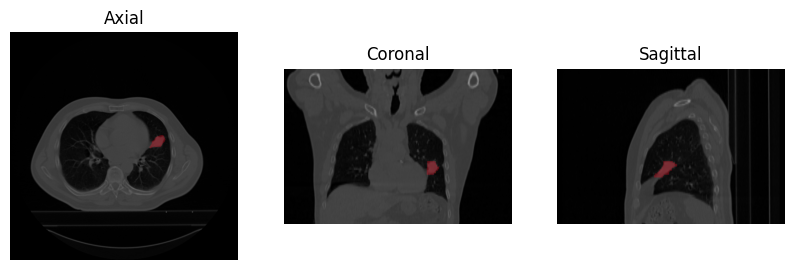

In [4]:
visualize_seed_point(row)

We can now convert the label to centroid coordinates (in the physical space). For this we,
1. Load the mask using SimpleITK
2. Use SimpleITK `LabelShapeStatisticsImageFilter` to get the centroid

In [5]:
mask = sitk.ReadImage(mask_path)

# get the center of massk from the mask via ITK
label_shape_filter = sitk.LabelShapeStatisticsImageFilter()
label_shape_filter.Execute(mask)
try:
    centroid = label_shape_filter.GetCentroid(255)
except:
    centroid = label_shape_filter.GetCentroid(1)

# extract x, y, and z coordinates from the centroid
x, y, z = centroid

# set up the coordinate dictionary
coordinate_dict = {
    "coordX": x,
    "coordY": y,
    "coordZ": z,
}

In [6]:
coordinate_dict

{'coordX': 74.38400898759812,
 'coordY': -10.182702709795393,
 'coordZ': -484.36077558804834}

In [7]:
row = {"image_path": image_path, **coordinate_dict}

Now we can call the visualize seed point function again but this time with the `image_path` and coordinate values

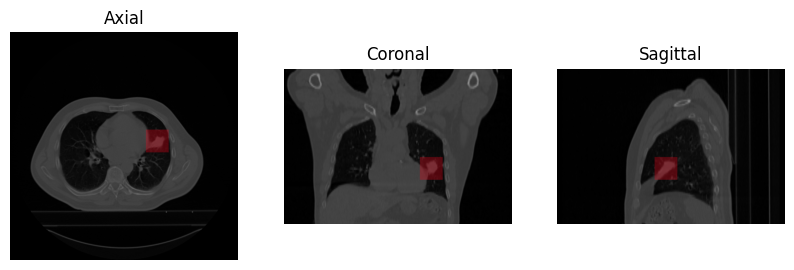

In [8]:
visualize_seed_point(row)

The bounding box that will be passed to FMCIB centered around the seed point is now seen. 